In [23]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
import pymc3 as pm
plt.style.use('seaborn-darkgrid')
%matplotlib inline

npr.seed(0)

alpha, sigma = 1, 2
beta = [1, 0]
N    = 100

# Predictors
X = npr.randn(2, N)

# Outcomes
Y = alpha + np.dot(beta, X) + npr.randn(N) * sigma

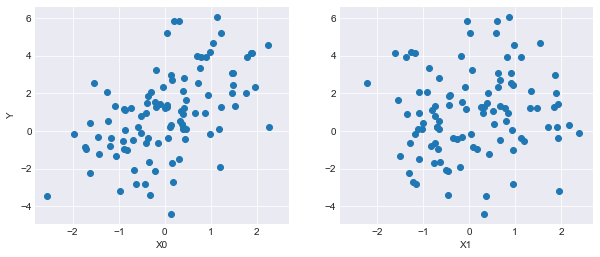

In [24]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10,4))
axes[0].scatter(X[0], Y)
axes[1].scatter(X[1], Y)
axes[0].set_ylabel('Y'); axes[0].set_xlabel('X0'); axes[1].set_xlabel('X1');

In [26]:
basic_model = pm.Model()

with basic_model:

    r     = pm.Beta('r', 1, 16)
    xi    = pm.Bernoulli('xi', r, shape=2)
    sigma = pm.HalfNormal('sigma', sd=1)
    alpha = pm.Normal('alpha', mu=0, sd=1)
    beta  = pm.Laplace('beta',  mu=0, b=1, shape=2)
    bss   = pm.Deterministic('bss', beta * xi)
    mu    = alpha + pm.math.dot(bss, X)
    Y_obs = pm.Normal('Y_obs', mu=mu, sd=sigma, observed=Y)

In [40]:
with basic_model:
    trace = pm.sample(5000, tune=1000, step_kwargs={'nuts':{'target_accept':0.95}})

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [beta, alpha, sigma, r]
>BinaryGibbsMetropolis: [xi]
Sampling 4 chains, 0 divergences: 100%|██████████| 24000/24000 [00:21<00:00, 1092.04draws/s]


/Users/bara947/.local/miniconda/envs/mars/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/Users/bara947/.local/miniconda/envs/mars/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/Users/bara947/.local/miniconda/envs/mars/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/Users/bara947/.local/miniconda/envs/mars/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Ar

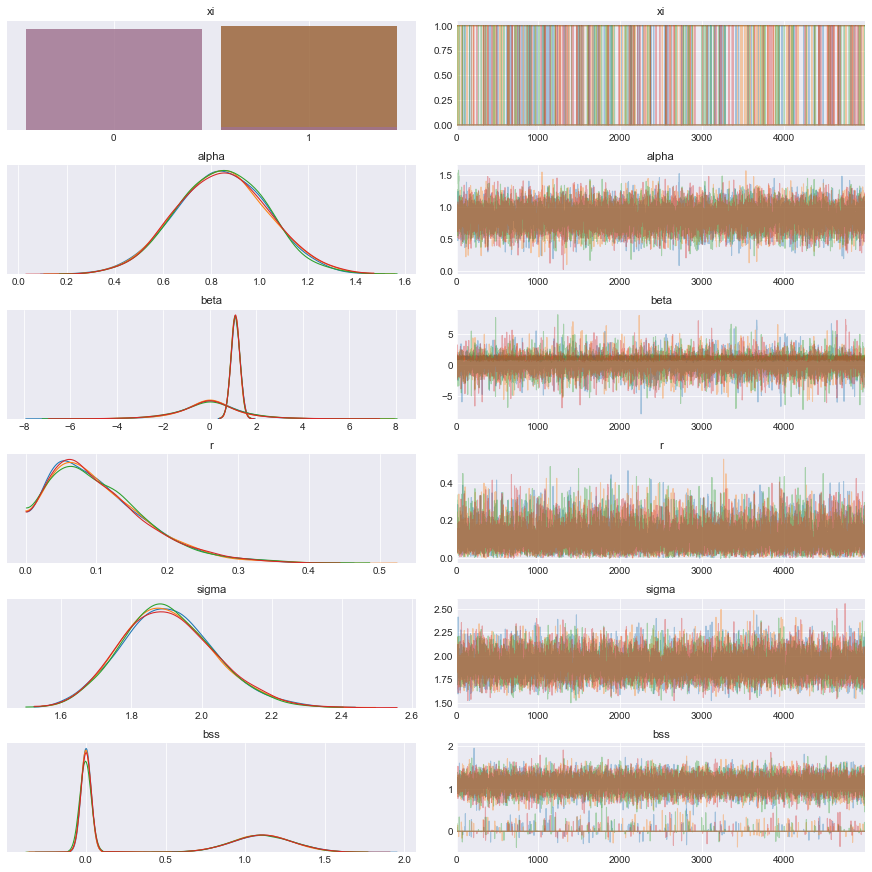

In [41]:
pm.traceplot(trace);

array([<matplotlib.axes._subplots.AxesSubplot object at 0x137d56d10>,
      dtype=object)

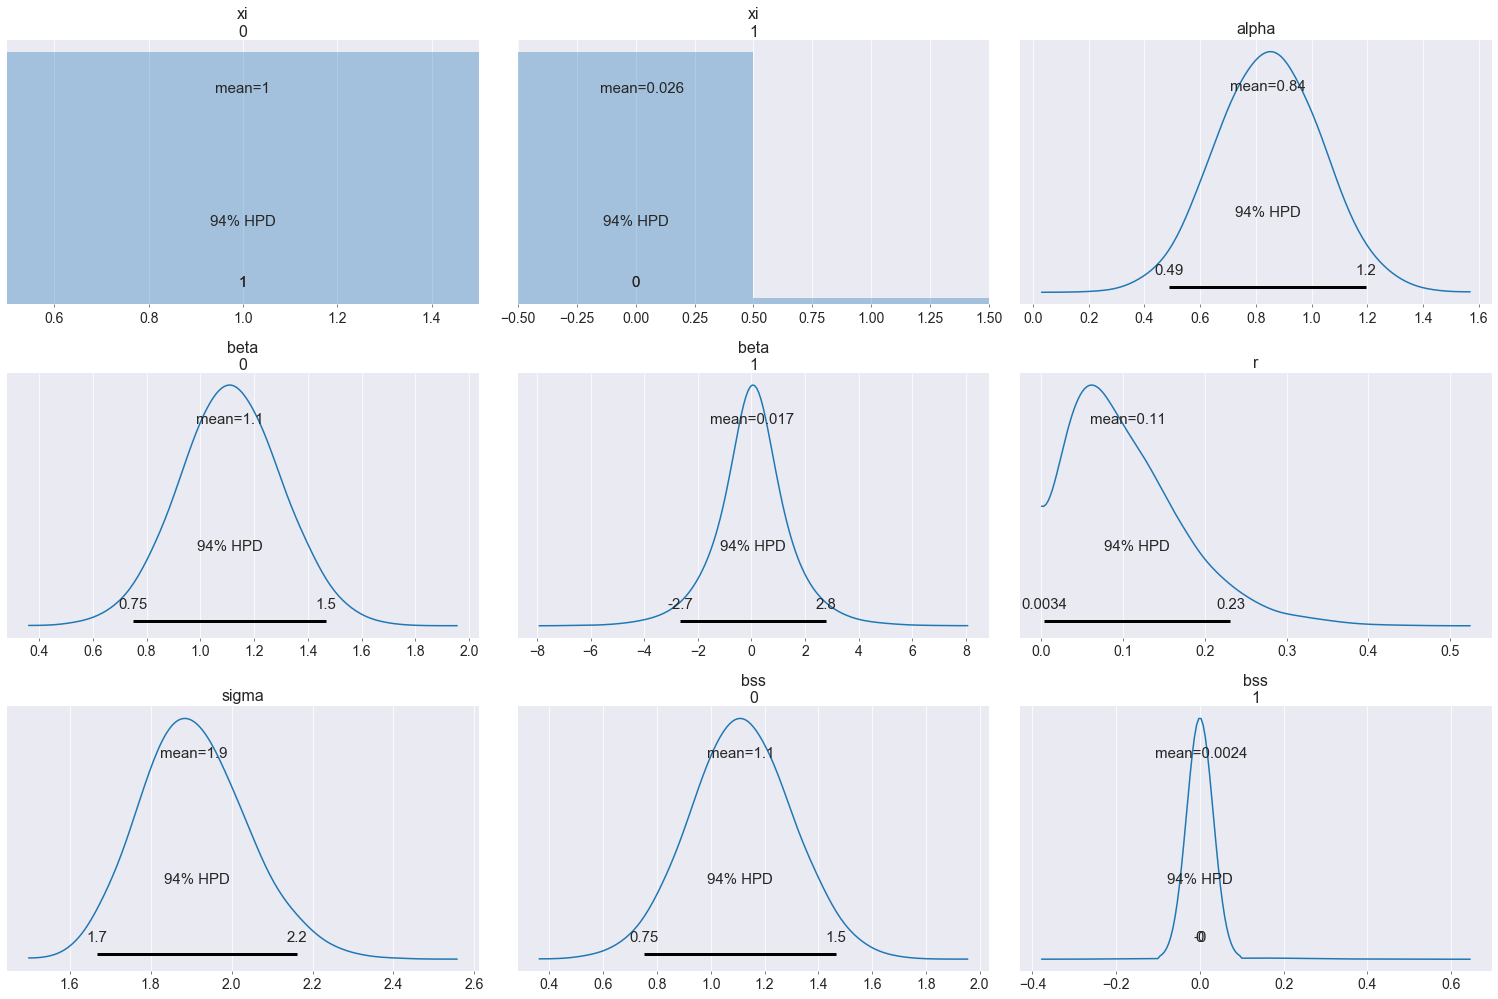

In [42]:
pm.plot_posterior(trace)